In [1]:
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from qutip import *
from qutip.piqs import *
import numpy as np
import array
from matplotlib import cm

In [31]:
wa = 1
wc = 1

nphot = 10

g = 0.01

ps = 0.0001

a = tensor(destroy(nphot), qeye(2))
sx = tensor(qeye(nphot), sigmax())
sz = tensor(qeye(nphot), sigmaz())

H = wc * a.dag()*a + wa * sz + g * (a.dag()**2+a**2) * sx

ip = tensor(basis(nphot,0), basis(2,1))
ipd = (ip*ip.dag())
inputstate = ipd

c1 = np.sqrt(ps)
c2 = np.sqrt(1-ps)

pss =(1/np.sqrt(c1**2+c2**2))*(c1 * basis(2,1) + c2 * basis(2,0))
psd = pss*pss.dag()
psdt = tensor(qeye(nphot), psd*psd.dag())
poststate = psdt

lim = 100
tmax = 1
t = np.linspace(0, tmax, lim)

print("gAw = ", g*t[1]/ps)

gAw =  1.0101010101010102


In [32]:
result = mesolve(H, inputstate, t, c_ops = [], e_ops = [])
evs = result.states[5]

In [33]:
ps = fidelity(psd, basis(2,1))**2
eta = (poststate.dag()*evs*poststate)/ps
kicked = eta.ptrace(0)

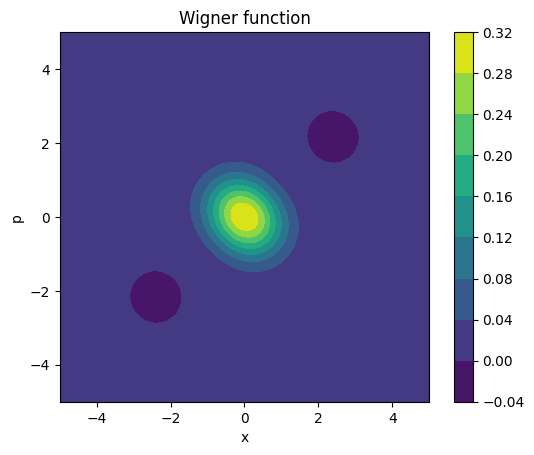

In [34]:
xvec = np.linspace(-5,5,200)
W = wigner(kicked, xvec, xvec)
cm = plt.cm.get_cmap('viridis')
plt.contourf(xvec, xvec, W, cmap = cm)
plt.axis('square')
plt.title("Wigner function")
plt.xlabel('x') 
plt.ylabel('p')
plt.colorbar()

In [35]:
g1 = g*t[5]/ps
b = destroy(nphot)
Hsq = wa * b.dag()*b + g1 * (b.dag()**2+b**2)
i1 = basis(nphot,0)
res = mesolve(Hsq, i1, t)
res1 = res.states[4]

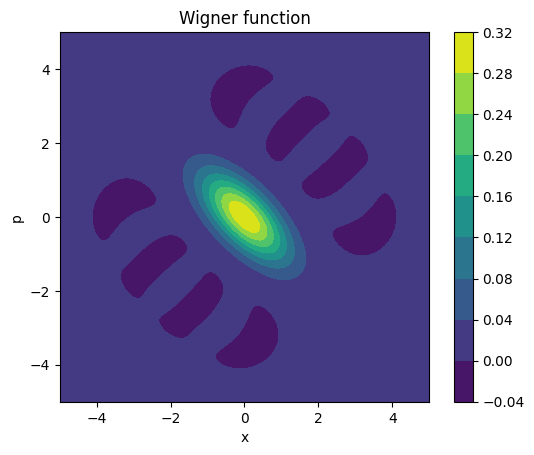

In [36]:
xvec = np.linspace(-5,5,200)
W1 = wigner(res1, xvec, xvec)
cm = plt.cm.get_cmap('viridis')
plt.contourf(xvec, xvec, W1, cmap = cm)
plt.axis('square')
plt.title("Wigner function")
plt.xlabel('x') 
plt.ylabel('p')
plt.colorbar()